In [1]:
!pip install py-AutoClean

  Created wheel for py-AutoClean: filename=py_AutoClean-1.1.3-py3-none-any.whl size=10295 sha256=1853c796861ad2cd967883e967a1a4eb9e00c219f617b6f9f702879f34a7f0bf
  Stored in directory: c:\users\kiran\appdata\local\pip\cache\wheels\ec\69\58\cebe3f3e7e78242900e9547a70801cb6ecc4f8e11872a0b71e
Successfully built py-AutoClean


In [2]:
import pandas as pd
data = pd.read_csv("C:/Users/kiran/Downloads/DataSets/claimants.csv")

In [3]:
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x223ac0b78e0>,
 'caps': [<matplotlib.lines.Line2D at 0x223ac0b7f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x223ac0b7610>],
 'medians': [<matplotlib.lines.Line2D at 0x223ac0d6460>],
 'fliers': [<matplotlib.lines.Line2D at 0x223ac0d6730>],
 'means': []}

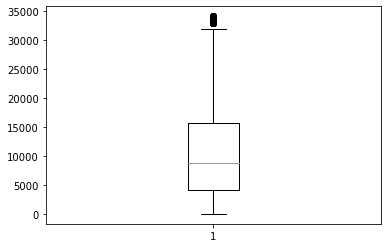

In [5]:
import matplotlib.pyplot as mpl
mpl.boxplot(data['CASENUM'])

{'whiskers': [<matplotlib.lines.Line2D at 0x223ad17cf10>,
 'caps': [<matplotlib.lines.Line2D at 0x223ad18c4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x223ad17cc40>],
 'medians': [<matplotlib.lines.Line2D at 0x223ad18ca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x223ad18cd60>],
 'means': []}

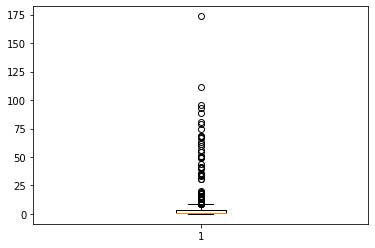

In [6]:
mpl.boxplot(data['LOSS'])

In [7]:
from AutoClean import AutoClean
pipeline = AutoClean(data, duplicates='auto' , missing_num = 'knn', outliers ='winz' )

AutoClean process completed in 1.347651 seconds
Logfile saved to: C:\Users\kiran\Desktop\autoclean.log


In [8]:
pipeline.output.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0,1,0,50,8.854
1,3,1,1,1,0,18,0.891
2,66,1,0,1,0,5,0.330
3,70,0,0,1,0,31,0.037
4,96,1,0,1,0,30,0.038


{'whiskers': [<matplotlib.lines.Line2D at 0x223aecd3d00>,
 'caps': [<matplotlib.lines.Line2D at 0x223aece22e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x223aecd3a00>],
 'medians': [<matplotlib.lines.Line2D at 0x223aece2880>],
 'fliers': [<matplotlib.lines.Line2D at 0x223aece2b50>],
 'means': []}

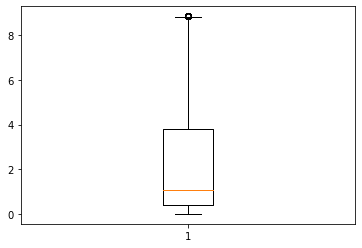

In [9]:
mpl.boxplot(pipeline.output['LOSS'])

In [10]:
pipeline.output.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64